## Gradient et dérivée d'un potentiel harmonique défini au moyen d'un tableau

On se donne un potentiel harmonique $\mathrm V = \omega x^2$ dans un tableau.
Le programme ci-dessous calcule la valeur du potentiel en un point donné (interpolation du tableau), et détermine la dérivée du potentiel en ce point.

Pour un potentiel $V(x)$ non spécifié a priori, le Lagrangien s'écrit :
$$
\mathrm{L}(x, \dot{x}) = \frac{1}{2}m \dot{x}^2-V(x)
$$
Et on aura pour l'équation de Lagrange  $$\frac{d}{dt}[\frac{\partial\mathrm{L}}{\partial\dot{x}}]=\frac{dV}{d{x}}\implies  \ddot{x}= V'(x)
$$

Le principe de l'intégration "leapfrog" s'écrit maintenant :

$$\boxed{
\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{\Delta t} & = & v_{n+1} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1) \\
\frac{v_{n+1}-v_{n}}{\Delta t} & = & x_n.V'(x_n) \;\;\;\;\;\;\;\;\;\;\; \;(2)
\end{eqnarray}}$$

Attention :
La vibration influant sur la position, se méfier des dépassements de capacité du vecteur potentiel. $V(x)$ n'est évidemment plus donné par le tableau si, lors du calcul leapfrog, $x>x_{MAX}$

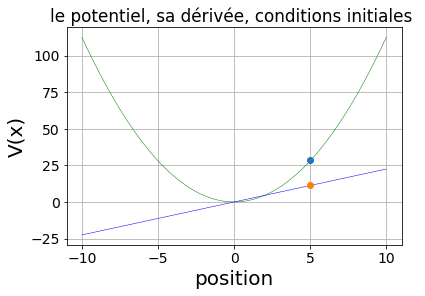

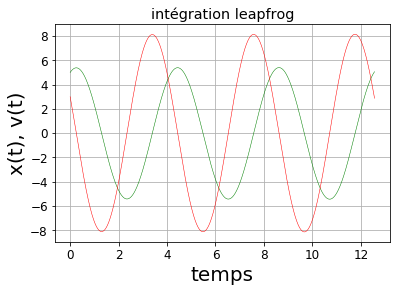

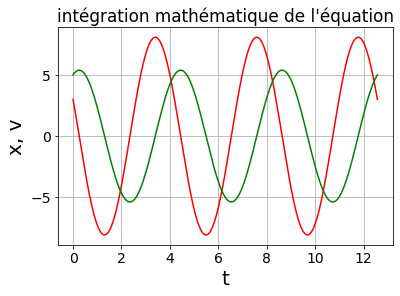

In [48]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
###############################################################################
# Entrée des paramètres +/-l limites d'espace, xp point courant, Nn pas, omeg pulsation

l=10.0
Nn=500
xp = np.linspace(-l, l, Nn)
s = np.linspace(-l, l, Nn-1) #utilisé pour les vecteurs dérivés qui n'ont que Nn-1 composantes
dxp=xp[1]-xp[0]
ds=s[1]-s[0]

###########################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm

Mm=72100
omeg=1.5
tps=3*2*3.141596/omeg #temps caractéristique posé égal à 3 fois la période
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###########################
# chargement du potentiel quadratique

V = (omeg**2/2)*xp**2

#######################
# Conditions initiales
x0=5.0
v0=3.0






###############################################################################
# calcul de la valeur du potentiel en un point x avec interpolation
def potiel(x,l,Nn, V):
        i=int(Nn*(x+l)/(2*l))
        r=Nn*(x+l)/(2*l)-i
        pot=V[i]+r*(V[i+1]-V[i])
        return pot

###############################################################################
# calcul de la dérivée du potentiel sous forme vectorielle à Nn-1 points
def dVdx(l, Nn, V):
        deltaV=zeros(Nn-1)
        for i in range(0,Nn-1):
                deltaV[i]=(V[i+1]-V[i])*((Nn)/(2*l))
        return deltaV

    
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x avec interpolation
def derivpot(z,l,Nn, Vprim):
        i=int((Nn-1)*(z+l)/(2*l))
        r=(Nn-1)*(z+l)/(2*l)-i
        pot=(Vprim[i]+r*(Vprim[i+1]-Vprim[i]))
    
        return pot


###############################################################################
# création de la fonction resoudre
def resoudre(x0,v0):
#######################################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
    
########################################
# Intégration "leapfrog"
    k0= derivpot(x[0],l,Nn,Vprim)
   
    for i in range(Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i-1],l,Nn,Vprim)
        
###########################################################################
# Solution
    return x,v
    
    
    
    
    

    
##############################################################################
#retour programme principal
Vprim=dVdx(l,Nn,V) 

x,v = resoudre(x0,v0) 


    
###############################################################################
# représentation graphique du potentiel
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(xp,V,'g',linewidth=0.5)
plt.plot(x0,potiel(x0,l,Nn, V),"o")
plt.plot(s,Vprim, 'b',linewidth=0.5)
plt.plot(x0,derivpot(x0,l,Nn, Vprim),"o")
xlabel("position")
ylabel("V(x)")
plt.title ("le potentiel, sa dérivée, conditions initiales ")
###############################################################################
show()


###############################################################################
# représentation graphique leapfrog
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20
figure()
plt.plot(tp,x,'g',linewidth=0.5)
plt.plot(tp,v,'r',linewidth=0.5)
xlabel("temps")
ylabel("x(t), v(t)")
plt.title ("intégration leapfrog")
###############################################################################
show()
###############################################################################




##########################################################################
# résolution numérique directe
phi=math.atan(omeg*x0/v0)
A=x0/sin(phi)

S=A*sin(phi+omeg*tp)

COS=omeg*A*cos(phi+omeg*tp)
###############################################################################
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(tp,COS,'r')
plt.plot(tp,S,'g')
xlabel("t")
ylabel("x, v")
plt.title ("intégration mathématique de l'équation")

show()



## Importance du pas de temps dans l'intégration

Dans le programme ci-dessous, on fait varier le pas de temps (inverse de la variable Mm du programme). On constate que la fonction intégrée dérive en amplitude lorsque le pas d'intégration n'est pas assez petit.

Sur l'exemple dessiné on a dû s'arrêter à Mm=480. En dessous la dérivation en amplitude est telle qu'on sort des limites du tableau de potentiel.

No handles with labels found to put in legend.


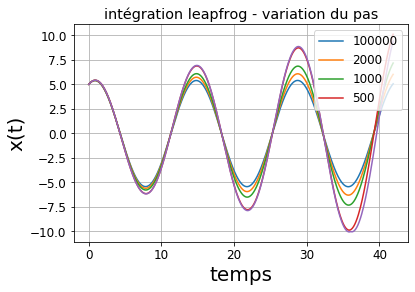

In [4]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
###############################################################################
# Entrée des paramètres +/-l limites d'espace, xp point courant, Nn pas, omeg pulsation

l=10.0
Nn=500
xp = np.linspace(-l, l, Nn)
s = np.linspace(-l, l, Nn-1) #utilisé pour les vecteurs dérivés qui n'ont que Nn-1 composantes
dxp=xp[1]-xp[0]
ds=s[1]-s[0]


omeg=1.5


###########################
# chargement du potentiel quadratique

V = (omeg**2/2)*xp**2

#######################
# Conditions initiales
x0=5.0
v0=3.0



###############################################################################
# calcul de la valeur du potentiel en un point x avec interpolation
def potiel(x,l,Nn, V):
        i=int(Nn*(x+l)/(2*l))
        r=Nn*(x+l)/(2*l)-i
        pot=V[i]+r*(V[i+1]-V[i])
        return pot

###############################################################################
# calcul de la dérivée du potentiel sous forme vectorielle à Nn-1 points
def dVdx(l, Nn, V):
        deltaV=zeros(Nn-1)
        for i in range(0,Nn-1):
                deltaV[i]=(V[i+1]-V[i])*((Nn)/(2*l))
        return deltaV

    
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x avec interpolation
def derivpot(z,l,Nn, Vprim):
        i=int((Nn-1)*(z+l)/(2*l))
        r=(Nn-1)*(z+l)/(2*l)-i
        pot=(Vprim[i]+r*(Vprim[i+1]-Vprim[i]))
    
        return pot


###############################################################################
# création de la fonction resoudre
def resoudre(x0,v0, Mm):
#######################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm

    tps=3*2*3.141596/omeg #temps caractéristique posé égal à 3 fois la période
    tp=np.linspace(0,tps,Mm)
    dtp = tp[1] - tp[0]

# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
    
########################################
# Intégration "leapfrog"
    k0= derivpot(x[0],l,Nn,Vprim)
   
    for i in range(Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i-1],l,Nn,Vprim)
        
###########################################################################
# Solution
    return x,v
    
    
     
##############################################################################

###############################################################################
# représentation graphique leapfrog
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20
figure()


xlabel("temps")
ylabel("x(t)")
plt.title ("intégration leapfrog - variation du pas")
###############################################################################

#retour programme principal
Vprim=dVdx(l,Nn,V) 

        

vecteur=[100000, 2000, 1000, 500, 485]

for i in range(0, 5):
    Mm= vecteur[i]
    x,v = resoudre(x0,v0, Mm) 
    
    tps=10*2*3.141596/omeg 
    tp=np.linspace(0,tps,Mm)
   



    
    plt.legend(loc='upper right')
    plt.plot(tp,x, linewidth=1.5, label= vecteur[i])


###############################################################################
###############################################################################
show()
###############################################################################





## Amélioration du système d'interpolation
La variante de programme ci-dessous utilise la fonction interp1d de scipy, au lieu des calculs d'interpolation linéaire. L'écriture du programme est sensiblement plus compacte.

No handles with labels found to put in legend.


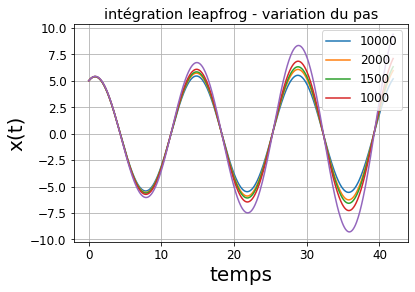

In [40]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import interp1d
###############################################################################
# Entrée des paramètres +/-l limites d'espace, xp point courant, Nn pas, omeg pulsation

l=10.0
Nn=500
xp = np.linspace(-l, l, Nn)
s = np.linspace(-l, l, Nn-1) #utilisé pour les vecteurs dérivés qui n'ont que Nn-1 composantes
dxp=xp[1]-xp[0]
ds=s[1]-s[0]
omeg=1.5

###########################
# chargement du potentiel quadratique

V = (omeg**2/2)*xp**2
fpot = interp1d(xp, V, kind='cubic')

#######################
# Conditions initiales
x0=5.0
v0=3.0


    
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x avec interpolation
def derivpot(z,l,Nn, fpot):
        k=0.001
        h=k*2*l/Nn
        pot=(fpot(z+h)-fpot(z))/h
        return pot


###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm):
########################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm

    tps=3*2*3.141596/omeg #temps caractéristique posé égal à 3 fois la période
    tp=np.linspace(0,tps,Mm)
    dtp = tp[1] - tp[0]
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(Mm)
    v = zeros(Mm)
    x[0] = x0
    v[0] = v0
    
########################
# Intégration "leapfrog"
    k0= derivpot(x[0],l,Nn,fpot)
   
    for i in range(Mm-1):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        k0=derivpot(x[i-1],l,Nn,fpot)

    return x,v
 

#retour programme principal
###############################################################################
# représentation graphique leapfrog
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20
figure()


xlabel("temps")
ylabel("x(t)")
plt.title ("intégration leapfrog - variation du pas")
###############################################################################


       

vecteur=[10000, 2000, 1500, 1000, 550]

for i in range(0, 5):
    Mm= vecteur[i]
    x,v = resoudre(x0,v0, Mm) 
    
    tps=10*2*3.141596/omeg 
    tp=np.linspace(0,tps,Mm)
   



    
    plt.legend(loc='upper right')
    plt.plot(tp,x, linewidth=1.5, label= vecteur[i])


###############################################################################
###############################################################################
show()
###############################################################################



## Précision du calcul de la dérivée.
Le programme ci-dessous vise à déterminer la précision du calcul de $\frac{dV}{dX}$ lorsqu'on a modélisé le potentiel à l'aide de Python interp1d.
On trouve que l'optimum se situe vers les $10^{-6}$ du pas retenu pour le potentiel.

0.045000000000133156
0.004500000000067672
0.00045000003445139214
4.500048055788852e-05
4.507005318288293e-06
4.320427287041184e-07
4.320427322568321e-07
2.5636709395371327e-06
4.164352140634264e-05
0.0004679691628552973


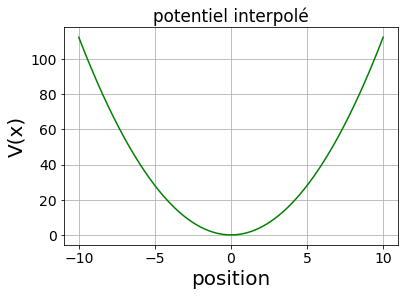

In [34]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import interp1d
###############################################################################
# Entrée des paramètres +/-l limites d'espace, xp point courant, Nn pas, omeg pulsation

l=10.0
Nn=500
xp = np.linspace(-l, l, Nn)
omeg=1.5



###########################
# chargement du potentiel quadratique

fpot = (omeg**2/2)*xp**2
V = interp1d(xp, fpot, kind='cubic')


###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point z avec interpolation
def derivpot(z,l,Nn, V,k):
        
        h=k*2*l/Nn
        pot=(V(z+h)-V(z))/h
        return pot
###############################################################################
x0=9


for i in range(10):
    k=10**(-i)
    delta=derivpot(x0, l, Nn, V,k)-2*V(x0)/x0

    print(delta)





###############################################################################
# représentation graphique du potentiel
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(xp,V(xp),'g',linewidth=1.5)


xlabel("position")
ylabel("V(x)")
plt.title ("potentiel interpolé")
###############################################################################
show()



